## Load data

In [1]:
import numpy as np
import pandas as pd

# Load data from Excel
df = pd.read_excel('RCAs.xlsx')
df = df[df["TERRITORIO"]== "Italy"]
# Filter column names that start with 'RCA'
columns_to_keep = [col for col in df.columns if col.startswith('RCA')]

# Drop columns not starting with 'RCA'
df = df[columns_to_keep]

df.fillna(0, inplace=True)
# Transpose columns
df = df.transpose()

## Compute stochastic multivariate kernel

In [3]:
x = df.values

t, n = x.shape
obs = t
years = n
span = 10

y1 = x[:, 0]
y2 = x[:, 0 + span]

for i in range(1, years - span):
    y1 = np.concatenate((y1, x[:, i]))
    y2 = np.concatenate((y2, x[:, i + span]))

y = np.column_stack((y1, y2))

numgr = 30

grig = np.linspace(-1.0, 1.0, numgr)[:, np.newaxis]
grog = np.linspace(-1.0, 1.0, numgr)[:, np.newaxis]

oss = y

d = 2
numo = oss.shape[0]

std_oss = np.std(oss)
prctile75 = np.percentile(oss, 75)
prctile25 = np.percentile(oss, 25)

iqr = prctile75 - prctile25

A  = min(std_oss, iqr)

h = 0.9* A * numo**(-1/5) /1.6

print(h)
#A = min([std(oss); (prctile(oss,75))- (prctile(oss,25))]); 
#h = 0.9*A*numo^(-1/5)/1.6; 
#print(h)

h = np.array([[h, 0], [0, h]])
dth = np.linalg.det(h)
IVH = np.linalg.inv(h)

fin = np.zeros((numgr, numgr))
for i in range(numgr):
    #u = np.zeros((numgr,))
    u = np.zeros((numgr))
    for p in range(numgr):
        for j in range(numo):
            #uu = (numo * dth) ** (-1) * (1 / (2 * np.pi)) * np.exp(-1 / 2 * ((np.array([grig[i], grog[p]]) - oss[j, :]).dot(IVH).dot(np.array([grig[i], grog[p]]) - oss[j, :]).T))
            uu = (numo * dth) ** (-1) * (1 / (2 * np.pi)) * np.exp(-1 / 2 * ((np.array([grig[i], grog[p]]).T - oss[j, :]).dot(IVH).dot((np.array([grig[i], grog[p]]).T - oss[j, :]).T)))
            #uu = (numo * dth) ** (-1) * (1 / (2 * np.pi)) * np.exp(-1 / 2 * ((np.array([grig[i], grog[p]]).T - oss[j, :])))
            #uu = (np.array([grig[i], grog[p]]) - oss[j, :]).T
            #print(np.array([grig[i], grog[p]]))
            #print(oss[j, :])
            #print(IVH)
            #print(uu.shape)
            #print(u[p].shape)
            #print(uu)
            
            u[p] += uu
    #print(u.shape)
    fin[i] = u

passo = grig[1] - grig[0]
vedi = fin.reshape((numgr, numgr))
norma = passo * passo * fin
q = np.sum(norma, axis=1)
nden = norma / q[:, np.newaxis]

denj = nden / np.sum(nden, axis=1)[:, np.newaxis]
marg = np.sum(denj, axis=1)
stk = denj.T / marg

pez = np.ones((numgr,))
fin2 = np.tile(grig, (numgr, 1)).reshape((-1, 1))
fin3 = np.tile(grog, (1, numgr)).reshape((-1, 1))
#stokkker = np.hstack((fin2, fin3, fin.T))


0.04472139111637211


U:\Users\BIOLGHIN\AppData\Local\Temp\317\ipykernel_17612\2360307078.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[p] += uu


In [84]:
df_stk = pd.DataFrame(stk)

In [85]:
#df_stk.to_excel('Kernelda1.xlsx', index=False)

## Plot 3d chart

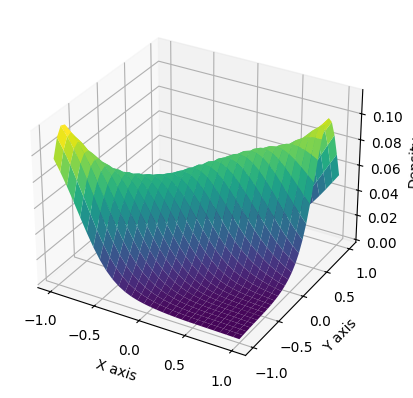

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the 3D plot
X, Y = np.meshgrid(grig.flatten(), grog.flatten())
Z = stk

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Density')

plt.show()

## Plot probability density

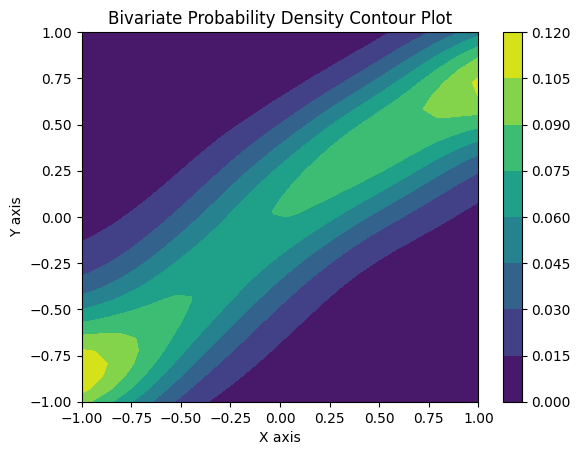

In [6]:
import matplotlib.pyplot as plt

# Create the 2D grid for contour plot
X, Y = np.meshgrid(grig.flatten(), grog.flatten())
Z = stk

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, cmap='viridis')

# Add a color bar for reference
fig.colorbar(contour)

# Label the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

plt.title('Bivariate Probability Density Contour Plot')

plt.show()
